In [1]:
!pip install autoviml

     |████████████████████████████████| 131 kB 14.2 MB/s 
     |████████████████████████████████| 564 kB 56.3 MB/s 
     |████████████████████████████████| 76.6 MB 109.9 MB/s 
     |████████████████████████████████| 193.7 MB 36 kB/s 
     |████████████████████████████████| 125 kB 56.9 MB/s 
     |████████████████████████████████| 175 kB 53.0 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=75cc4cb552c6ef503cc61468ad22b95038eaaf92b4ea5e26edd63cf4bd0177d6
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [5]:
import pandas as pd
from autoviml.Auto_ViML import Auto_ViML

In [6]:
df = pd.read_csv('/content/drive/MyDrive/NLP/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0


In [11]:
num = int(0.9*df.shape[0])
train = df[:num]
test = df[num:]
sample_submission=''
scoring_parameter = 'balanced-accuracy'
target = 'target'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (922, 14)
    Training Set Memory Usage = 0.10 MB
Test Set Shape = (103, 14)
    Test Set Memory Usage = 0.01 MB
Single_Label Target: ['target']
Random shuffling the data set before training
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
       Class  -> Counts -> Percent
           0:     452  ->   49.0%
           1:     470  ->   51.0%
    Target target is already numeric. No transformation done.
Alert! Rare Class is not 1 but 0 in this data set
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    13 Predictors classified...
    No variables removed since no ID or low-information variables f

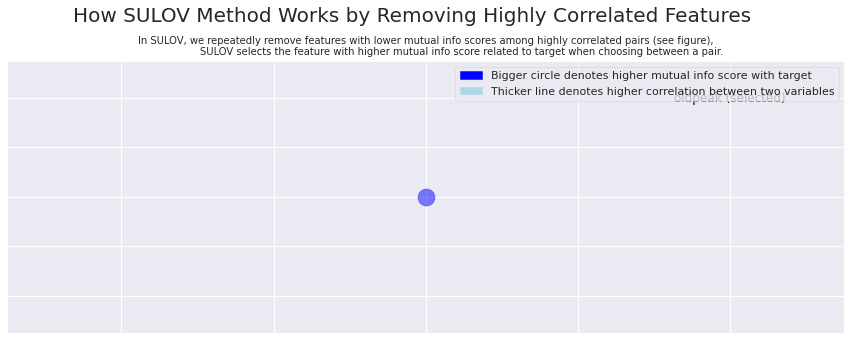

Splitting selected features into float and categorical (integer) variables:
    (1) float variables ...
    (12) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 13 
    Finding Important Features using Boosted Trees algorithm...
        using 13 variables...
        using 10 variables...
        using 7 variables...
        using 4 variables...
Found 12 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  829 , CV rows =  93
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling of train and validation data
####

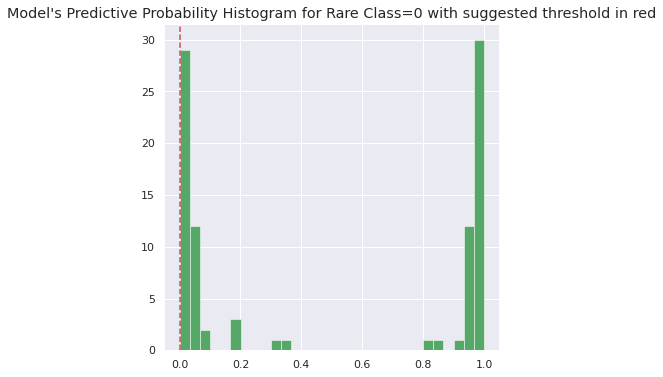

    Using threshold=0.5. However, 0.000 provides better F1=0.67 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 48.4%
Balanced Accuracy = 98.91% with Threshold = 0.50
Confusion Matrix:
[[45  1]
 [ 0 47]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.98      1.00      0.99        47

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93

Balanced Accuracy = 48.91% with Threshold = 0.00
Confusion Matrix:
[[45  1]
 [47  0]]
              precision    recall  f1-score   support

           0       0.49      0.98      0.65        46
           1       0.00      0.00      0.00        47

    accuracy                           0.48        93
   macro avg       0.24      0.49      0.33        

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 49.5%
    Balanced Accuracy = 50.0%
    Precision         = 0.0%
    Average Precision = 24.7%
    Recall            = 0.0%
    F1 Score          = 0.0%
#####################################################
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        46
           1       0.00      0.00      0.00        47

    accuracy                           0.49        93
   macro avg       0.25      0.50      0.33        93
weighted avg       0.24      0.49      0.33        93

[[46  0]
 [47  0]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


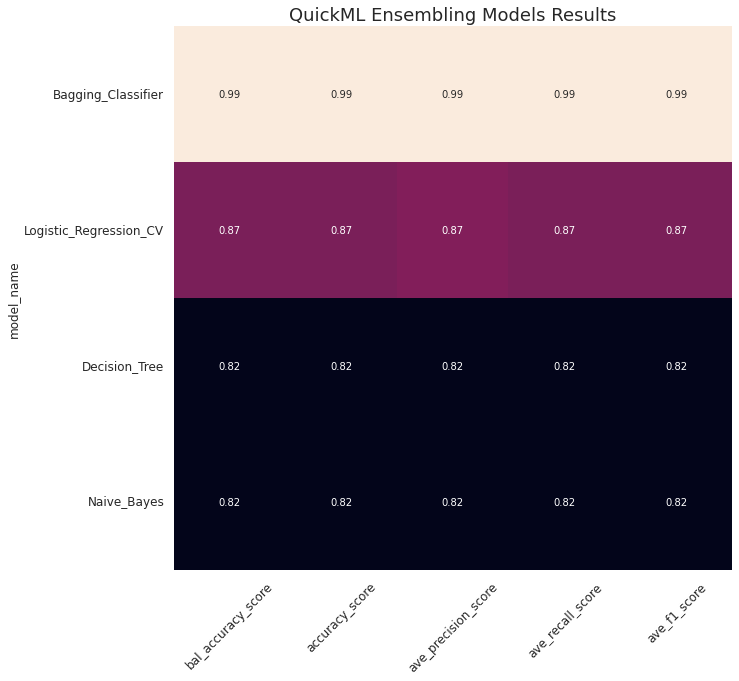

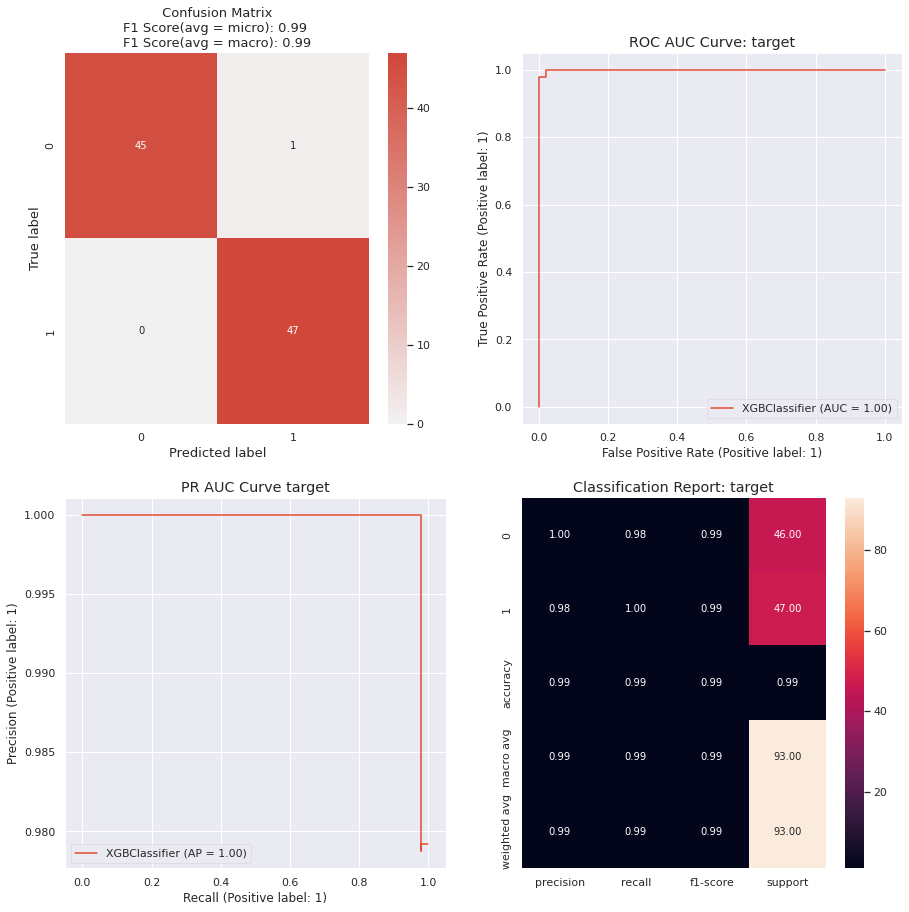

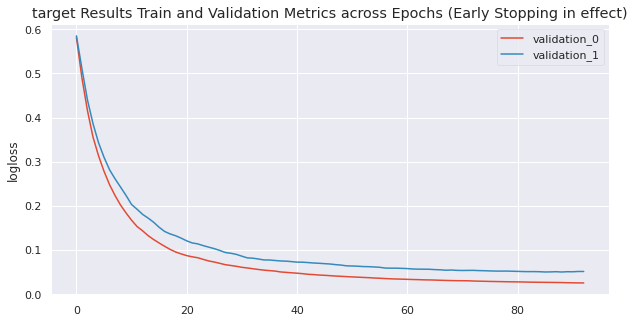

    Time taken for this Target (in seconds) = 863
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
###########################################################################
#####   F I N A L I Z I N G   M O D E L   O N    F U L L   T R A I N  #####
###########################################################################
     Actual Training time taken in seconds = 1
Training of models completed. Now starting predictions on test data...
    Making test Data predictions using modified Threshold = 0.000
    Calculating weighted average ensemble of 5 classifiers
    Plotting Feature Importances to explain the output of model
Trying to plot SHAP values if SHAP is installed in this machine...


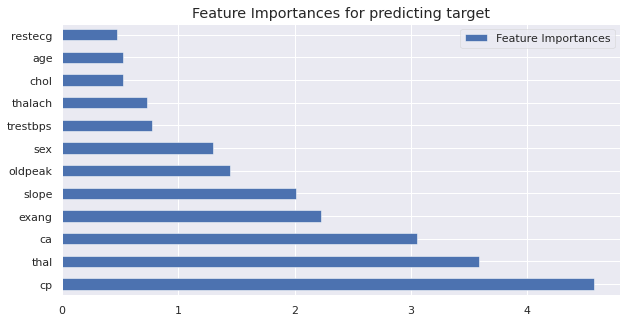

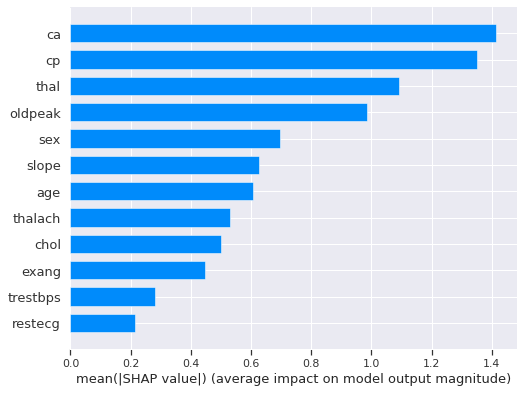

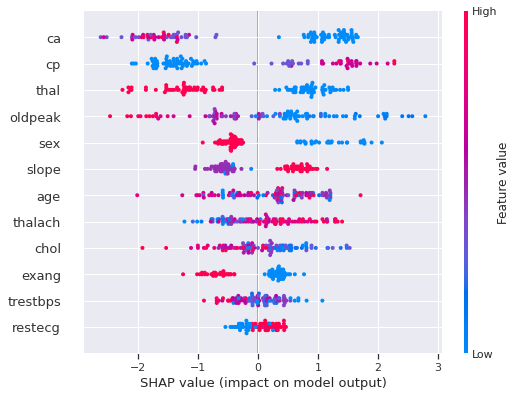

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 867
Writing Output files to disk...
    Saving predictions to ./target/target_Binary_Classification_test_modified.csv
    Saving predictions to ./target/target_Binary_Classification_submission.csv
    Saving predictions to ./target/target_Binary_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 14.5 for the Entire Process


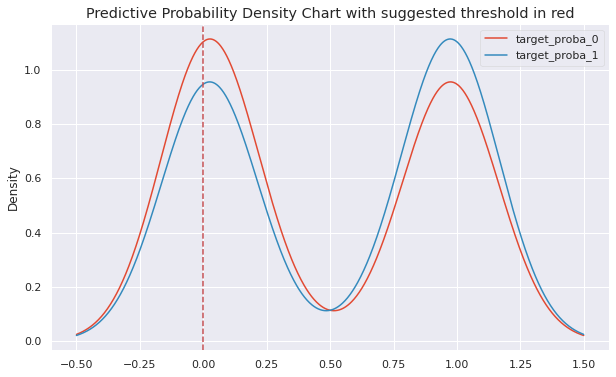

In [12]:
m, feats, trainm, testm = Auto_ViML(train, target, test, sample_submission,
                                    scoring_parameter=scoring_parameter,
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False,                                    
                                    Imbalanced_Flag=False, 
                                    verbose=3)    

In [13]:
def reverse_dict(map_dict):
    return dict([(v,k) for (k,v) in map_dict.items()])
# Use this to Test Classification Problems Only ####
ret_dict = {0: 0, 1: 1}
map_dict = reverse_dict(ret_dict)
m_thresh = 0.21
modelname='XGBoost'
#####################################################################
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
try:
    print('Normal Balanced Accuracy = %0.2f%%' %(
        100*balanced_accuracy_score(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>0.5).astype(int).values)))
    print('Test results since target variable is present in test data:')
    print(confusion_matrix(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>0.5).astype(int).values))
    print(classification_report(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>0.5).astype(int).values))
    print('Modified Threshold Balanced Accuracy = %0.2f%%' %(
        100*balanced_accuracy_score(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>m_thresh).astype(int).values)))
    print(confusion_matrix(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>m_thresh).astype(int).values))
    print(classification_report(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>m_thresh).astype(int).values))
except:
    print('No target variable present in test data. No results')

Normal Balanced Accuracy = 100.00%
Test results since target variable is present in test data:
[[47  0]
 [ 0 56]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        56

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103

Modified Threshold Balanced Accuracy = 100.00%
[[47  0]
 [ 0 56]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        56

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103

